In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [4]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27,31,0.0
1,85.0,64.0,59.0,32,23,0.0
2,86.0,54.0,33.0,16,54,0.0
3,91.0,78.0,34.0,24,36,0.0
4,98.0,55.0,13.0,17,17,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22,35,4.0
341,89.0,48.0,32.0,22,14,4.0
342,85.0,52.0,22.0,23,34,4.0
343,95.0,93.0,21.0,27,47,6.0


In [5]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	6
float64		column 3	3
int64		column 4	0
int64		column 5	0
float64		column 6	3


In [6]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,339.000000,339.000000,342.000000,345.000000,345.000000,342.000000
mean,90.115044,69.592920,30.444444,24.643478,38.284058,3.480994
std,4.400280,18.171587,19.587719,10.064494,39.254616,3.340907
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,92.000000,79.000000,34.000000,27.000000,46.000000,6.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

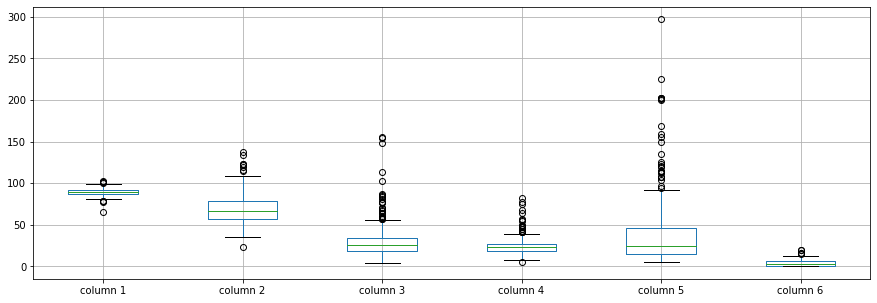

In [7]:
df.boxplot(return_type='axes', figsize=(15,5))

In [8]:
df.mean()

column 1    90.115044
column 2    69.592920
column 3    30.444444
column 4    24.643478
column 5    38.284058
column 6     3.480994
dtype: float64

In [9]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.030572,0.153584,0.192369,0.222022,0.302944
column 2,0.030572,1.000000,0.050124,0.126006,0.126482,0.106794
column 3,0.153584,0.050124,1.000000,0.740266,0.503120,0.203531
column 4,0.192369,0.126006,0.740266,1.000000,0.527626,0.283198
column 5,0.222022,0.126482,0.503120,0.527626,1.000000,0.338198
column 6,0.302944,0.106794,0.203531,0.283198,0.338198,1.000000


In [10]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [6,6+14,6+14+14,6+14+14+14,6+14+14+14+14,6+14+14+14,6+14+14,6+14,6], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=14)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 278.46020871117
Epoch: 1 , loss: 277.97786821637834
Epoch: 2 , loss: 277.42364719935824
Epoch: 3 , loss: 276.03231012253536
Epoch: 4 , loss: 276.5396205357143
Epoch: 5 , loss: 276.93314397902714
Epoch: 6 , loss: 277.94283766973587
Epoch: 7 , loss: 277.989008585612
Epoch: 8 , loss: 277.7229686918713
Epoch: 9 , loss: 276.8751438685826
Epoch: 10 , loss: 279.0284968784877
Epoch: 11 , loss: 276.1297171456473
Epoch: 12 , loss: 277.1303485688709
Epoch: 13 , loss: 276.81696355910526
Training complete. Saving file...
Model saved in file: tmp/MIDAS


In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.0
column 2    47.0
column 3    28.0
column 4    15.0
column 5    18.0
column 6     0.5
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.0,0.0,0,0,0.0
1,0.0,0.0,0.0,0,0,0.0
2,0.0,0.0,0.0,0,0,0.0
3,0.0,0.0,0.0,0,0,0.0
4,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...
340,0.0,0.0,0.0,0,0,0.0
341,0.0,0.0,0.0,0,0,0.0
342,0.0,0.0,0.0,0,0,0.0
343,0.0,0.0,0.0,0,0,0.0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

316.78758029391514

In [19]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [20]:
NRMS=numerator/denominator
NRMS


0.12572122634381855

In [21]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [22]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27,31,0.0
1,85.0,64.0,59.0,32,23,0.0
2,86.0,54.0,33.0,16,54,0.0
3,91.0,78.0,34.0,24,36,0.0
4,98.0,55.0,13.0,17,17,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22,35,4.0
341,89.0,48.0,32.0,22,14,4.0
342,85.0,52.0,22.0,23,34,4.0
343,95.0,93.0,21.0,27,47,6.0


In [23]:
imputations[-1].to_excel("Bupa_NE_1(imp).xlsx", index=False, header=False)